# AIR Coding Test
Alexander Taylor

First, I would like to thank the American Institutes for Research for providing me this testing opportunity. In this report, I will be answering three problems to AIR's Coding Test. This report will present my thoughts and rationale for approaching each problem, as well as the code to my solution. I also have a `code` file with this folder, to show documentation and comments for my functions.

## 1. Machine Learning

In this problem, we will train a model to predict a Class variable regarding whether there is a mutation (1) or not a mutation (0). <b>a.</b> Because this is a classification problem, we will use a confusion matrix to evaluate the performance. This is a common performance metric for medical diagnoses, because we can evaluate the model's Recall and Precision. This allows us to compare whether our model predicts a certain disagnosis inaccurately more often than other diagnoses and gives us more information when improving our model.

In order to keep our report clean and free from functions, all of our functions have been loaded from our `code.py` file.

In [1]:
import code

In [2]:
genes = code.load_gene_data()

<b>b.</b> Next we will split our `genes` dataset into a training and testing set using sklearn's <i>train_test_split</i>. We will first separate our dataset into `X` and `y` dataframes before implementing the split. We will set the <i>test_size</i> as 0.3, leaving 70% of our data to be used in training our model. We will use cross validation later to improve the sophistication of our model.

In [3]:
X, y = code.split_X_y(genes)

X_train, X_test, y_train, y_test = code.split_into_train_test(X, y)

<b>c.</b> We will first test our model using a Logistic Regression Classifier. We will use sklearn's `LogisticRegression`. For now, we will keep our default parameters, but we will tinker with these parameters when we try to improve our models. 

In [10]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

fitted_logistic_regression = code.build_model(logistic_regression, X_train, y_train)

logistic_regression_predictions = code.get_model_predictions(fitted_logistic_regression, X_test)

The results below present the confusion matrix, precision, recall, and F1 scores for our Logistic Regression model. Looking at our confusion matrix, positive values (i.e. mutation found) are classified as 1 whereas negative values (i.e. mutation not found) are classified as 0. We see that a significant amount of our data are zero values, and only a small number of positive values. We can see the model does a good job at predicting negative classifications. We see that the model predicts about 50-60 False Negatives (predicted as negative, but are actually positive), and around 10-20 False Positives (predicted as positive, but are actually negative).

We find that our F1 score, the harmonic mean between precision and recall, is somewhere around 65-70%. Our Precision, the formula presented below and is the model's accuracy based on the positive results it identified as positive, is approximately 80-90%. Finally, the formula presented below and the model's accuracy based on all of the actual postive results. We got a Recall score of 50-60%. This tells us that our model performs relatively well, general output result of 66.1% percent accurate, but it is very limited at identifying cases that are actually positive. This is concerning considering this is mutation diagnosing: having a Recall is bad since we're only slightly better than 50/50 guessing.

We will see if our Random Forest Classifier will perform the same way, but my first impression is that positive diagnoses are undersampled, considering there are only 492 cases in the entire dataset.

Precision: $\frac {True Positives}{True Positives + False Positive}$

Recall: $\frac {True Positives}{True Positives + False Negatives}$

F1 Score: $2 * \frac {Precision * Recall}{Precision + Recall}$

F1 Score: 0.705
Precision: 0.886
Recall: 0.585


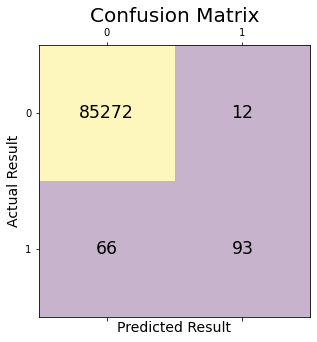

In [12]:
code.evaluate_model(y_test, logistic_regression_predictions)

<b>d.</b> Our next test is to train a Random Forest Classifier to test its accuracy. We will build our model using the classifier's default settings, and perform the same tests as our Logistic Regression.

In [14]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

fitted_random_forest = code.build_model(random_forest, X_train, y_train)

random_forest_predictions = code.get_model_predictions(fitted_random_forest, X_test)

Below is the confusion matrix, F1 score, Precision, and Recall for our Random Forest. We see that our confusion matrix performed better than our Logistic Regression. We find that our F1-score, our general accuracy output, is around 85%. This is better than our Logistic Regression. As expected, the model did a good job of identifying negative values, since this is the vast majority of our data. Our False Positives are also lower than our Logistic Regression, somewhere between 5-10 cases. This is reflected in our Precision score, which is around 95%. Finally, our Recall performed better than our Logistic Regression, only 36 False Negatives and a Recall score of around 77%.

F1 Score: 0.854
Precision: 0.953
Recall: 0.774


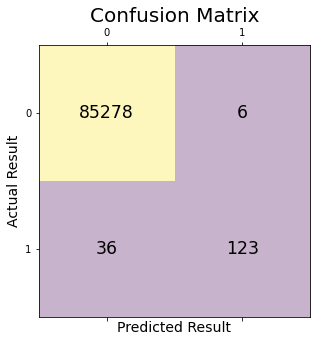

In [15]:
code.evaluate_model(y_test, random_forest_predictions)

<b>e.</b> We find that our Random Forest Classifier performed fairly well considering we only used a base model, no modifications or sophistication so far. But we believe this can be improved. First, it looks like our "no mutation" class is oversampled, nearly 99.9% of cases are negative diagnoses. This imbalances our data since it is difficult for the model to distinguish differences between the classes.

We will resample our data to undersample our "no mutation" class, and rerun our model.

In [7]:
X_resampled, y_resampled = code.undersample_X_y(X, y)

In [9]:
resample_X_train, resample_X_test, resample_y_train, resample_y_test = code.split_into_train_test(
    X_resampled, y_resampled
)

In [13]:
resampled_random_forest = code.build_model(random_forest, resample_X_train, resample_y_train)

resampled_forest_predictions = code.get_model_predictions(resampled_random_forest, resample_X_test)

After we resampled our data, under sampling our "no mutation" class, we got 492 cases for both 0 and 1 classes. When we re-fit and predicted our resampled our Random Forest, we got the confusion matrix, Precision, Recall, and F1 score below. All metrics, except Precision, improved. Our F-1 score improved to around 90%. Our Precision score was about the same, around 95%. But our Recall improved the most, jumping up to around 85-90%. This is a significant improvement and indicative of how the oversampled "no mutation" class affected our dataset.

F1 Score: 0.933
Precision: 0.978
Recall: 0.893


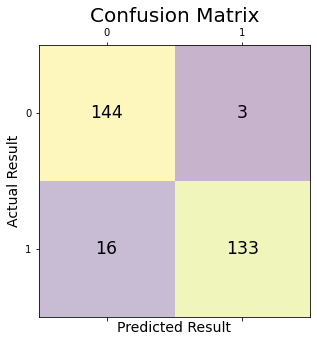

In [14]:
code.evaluate_model(resample_y_test, resampled_forest_predictions)

## 2. Implementing an Edit-Distance Algorithm

Next, we wrote a program that calculated a modified Hamming distance algorithm. 

In [2]:
code.get_edit_distance_score('make', 'Mage')
code.get_edit_distance_score('MaiSy', 'MaiZy')
code.get_edit_distance_score('Eagle', 'Eager')
code.get_edit_distance_score('Sentences work too.', 'Sentences wAke too.')

Distance Score between make and Mage = 1
Distance Score between MaiSy and MaiZy = 0.5
Distance Score between Eagle and Eager = 2
Distance Score between Sentences work too. and Sentences wAke too. = 3.5


In [5]:
code.get_edit_distance_score('data Science', 'Data Sciency')
code.get_edit_distance_score('organizing', 'orGanising')
code.get_edit_distance_score('AGPRklafsdyweIllIIgEnXuTggzF', 'AgpRkliFZdiweIllIIgENXUTygSF')

Distance Score between data Science and Data Sciency = 1.5
Distance Score between organizing and orGanising = 0.5
Distance Score between AGPRklafsdyweIllIIgEnXuTggzF and AgpRkliFZdiweIllIIgENXUTygSF = 10.5


The most expected application for a hamming distance algorithm might be for a spell check application. If someone mispells a word, they are likely entering a word only a few letters or cases off. The algorithm is one way to search a list or database based on how far away the erred word is from a nearby correctly spelled word.

## 3. Data Cleaning

In our final problem, we will analyze our `patent data` and search our dataframe based on certain keywords. <b>a.</b> to search for how many patents have a description that includes <i>embody</i> and its many conjugations, we will separate our `text` column and search our strings. We find 1312 patents have the word <i>embod...</i> somewhere in the description. We also added a space before the word, in case there were any possible prefixes to embody.

Finally, to search for phrases like <i>embody an invention</i> we used regular expressions. We first started with our original premise, <i>embod...</i>, included a period to represent any letter, digit, etc. and an asterisk to represent that there may be many words or digits between the words <i>embod</i> and <i>invention</i>. In total, there are 807 patents that include some version of <i> embodies my invention</i>.

In [2]:
patents = code.load_patent_data()
descriptions = patents['text']

In [3]:
code.search_for_keyword(' embod', descriptions)

1312

In [4]:
code.search_for_phrase(' embod', 'invention', descriptions)

807